In [2]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt # Collect coords into list


In [11]:
# query_url = f"https://{s}.data.osmbuildings.org/0.2/{k}/tile/{z}/{x}/{y}.json"
sample_url = "http://{s}.data.osmbuildings.org/0.2/anonymous/tile/{z}/{x}/{y}.json"
# response = requests.get(sample_url)
# data = response.json()
# response

In [3]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url,
                        params={'data': overpass_query})
data = response.json()


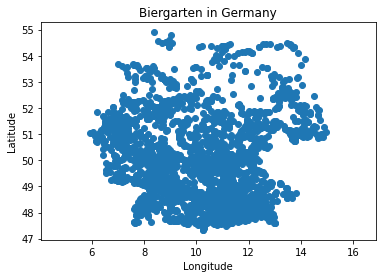

In [6]:
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()